In [1]:
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

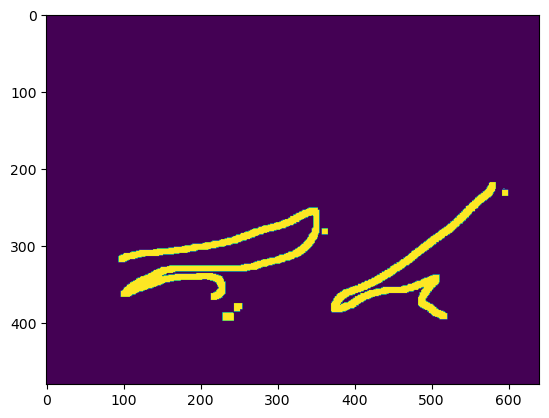

In [2]:
from utils.data_utils import ImageDataset, create_dataloaders

data = ImageDataset(r"data/birds.png", r"data/birds_fore.png", r"data/birds_back.png")
train_loader, test_loader = create_dataloaders(data)

plt.imshow(data.mask_fore)
plt.show()

In [3]:
from utils.training_utils import full_training
from torch.optim import AdamW
from models import Network

net = Network(5, 1)
optimizer = AdamW(net.parameters(), 0.01)

full_training(net, train_loader, test_loader, optimizer, None, model_name="normal")

Starting training from epoch: 0
Epoch 1 | Time 9.31 | Train Loss 0.0105 | Test Loss 0.0266 | Test Acc 0.991
Epoch 2 | Time 8.35 | Train Loss 0.01165 | Test Loss 0.0174 | Test Acc 0.993
Epoch 3 | Time 7.37 | Train Loss 0.005905 | Test Loss 0.0201 | Test Acc 0.994
Epoch 4 | Time 8.42 | Train Loss 0.001233 | Test Loss 0.0296 | Test Acc 0.989
Epoch 5 | Time 8.13 | Train Loss 0.1048 | Test Loss 0.0165 | Test Acc 0.995
Epoch 6 | Time 8.33 | Train Loss 0.03913 | Test Loss 0.0244 | Test Acc 0.994
Epoch 7 | Time 8.73 | Train Loss 0.009254 | Test Loss 0.0313 | Test Acc 0.99
Epoch 8 | Time 10.1 | Train Loss 0.004138 | Test Loss 0.0178 | Test Acc 0.994
Epoch 9 | Time 9 | Train Loss 0.01968 | Test Loss 0.012 | Test Acc 0.995
Epoch 10 | Time 8.24 | Train Loss 0.01425 | Test Loss 0.0112 | Test Acc 0.997
Epoch 11 | Time 10.1 | Train Loss 0.007923 | Test Loss 0.0178 | Test Acc 0.995
Epoch 12 | Time 8.72 | Train Loss 0.004237 | Test Loss 0.0212 | Test Acc 0.992


KeyboardInterrupt: 

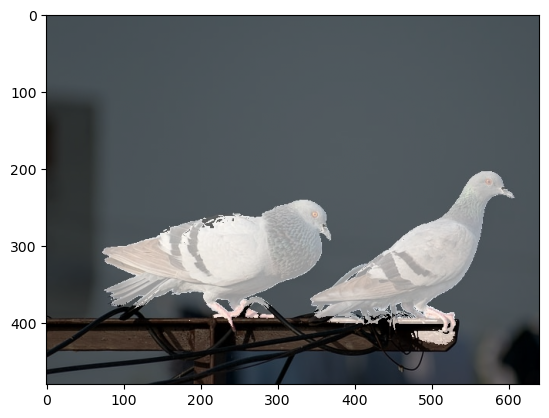

In [4]:
from utils.training_utils import inference

image, predictions = inference(Network(5, 1), r".snapshots/normal_best.pth.tar", r"data/birds.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()

In [5]:
import torch
import numpy as np
from torch.utils.data import TensorDataset

targets = torch.tensor(predictions.reshape((predictions.size, 1)))

image = ImageDataset.preprocess_image(r"data/birds.png")
features = ImageDataset.extract_from_mask(
    image, np.ones(image.shape[:2], dtype=bool))

data = TensorDataset(torch.tensor(features[:, :2]), targets)

train_loader, test_loader = create_dataloaders(data)

In [6]:
from utils.training_utils import full_training
from torch.optim import AdamW
from model import Network

net = Network(2, 1, convex=True)
optimizer = AdamW(net.parameters(), 0.001)

full_training(net, train_loader, test_loader, optimizer, None, model_name="convex")

Starting training from epoch: 0
Epoch 1 | Time 47.5 | Train Loss 0.2101 | Test Loss 0.143 | Test Acc 0.933
Epoch 2 | Time 45.6 | Train Loss 0.08921 | Test Loss 0.114 | Test Acc 0.953
Epoch 3 | Time 57.9 | Train Loss 0.04975 | Test Loss 0.0948 | Test Acc 0.963
Epoch 4 | Time 53.3 | Train Loss 0.1522 | Test Loss 0.0874 | Test Acc 0.968
Epoch 5 | Time 50.5 | Train Loss 0.06449 | Test Loss 0.0909 | Test Acc 0.959
Epoch 6 | Time 44.1 | Train Loss 0.01353 | Test Loss 0.087 | Test Acc 0.962
Epoch 7 | Time 48.7 | Train Loss 0.1227 | Test Loss 0.0799 | Test Acc 0.968
Epoch 8 | Time 45.1 | Train Loss 0.07677 | Test Loss 0.109 | Test Acc 0.958
Epoch 9 | Time 45.8 | Train Loss 0.1064 | Test Loss 0.0786 | Test Acc 0.967
Epoch 10 | Time 45.2 | Train Loss 0.1225 | Test Loss 0.0818 | Test Acc 0.966
Epoch 11 | Time 47.6 | Train Loss 0.03095 | Test Loss 0.0825 | Test Acc 0.964
Epoch 12 | Time 46.2 | Train Loss 0.0738 | Test Loss 0.0773 | Test Acc 0.968
Epoch 13 | Time 48.3 | Train Loss 0.1189 | Test Los

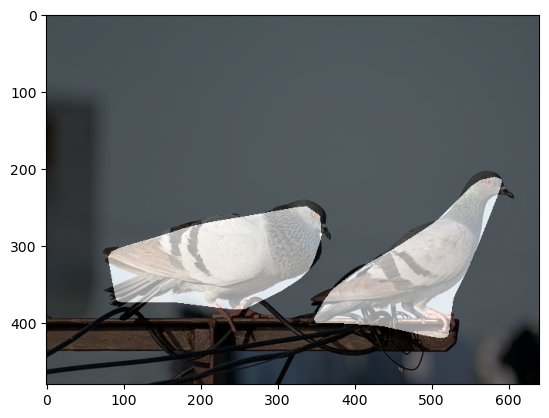

In [8]:
from utils.training_utils import inference

image, predictions = inference(Network(2, 1, convex=True), r".snapshots/convex_checkpoint.pth.tar", r"data/birds.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()